In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import cartopy
import dask
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import intake
import fsspec
import requests
import aiohttp
import nc_time_axis
import cftime
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

/var/folders/7y/lr_w90f56s35gmw3l6ghkz_w0000gn/T/ipykernel_4174/2597540415.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [3]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2' & experiment_id =='1pctCO2'")
ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[-1]), consolidated=True)
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])

In [4]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_tas_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR'")

# df_ta_ncar.experiment_id.unique()
df_tas_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
53470,CMIP,NCAR,CESM2,amip,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1...,NaN,20190218
55166,CMIP,NCAR,CESM2,amip,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r3i1p1f1...,NaN,20190220
55264,CMIP,NCAR,CESM2,amip,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r2i1p1f1...,NaN,20190220
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [5]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_tas_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR' & experiment_id == '1pctCO2'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_his = df_tas_ncar_his.zstore.values[-1]
print(zstore_his)

# create a mutable-mapping-style interface to the store
mapper_his = fsspec.get_mapper(zstore_his)

# open it using xarray and zarr
ds_tas_his = xr.open_zarr(mapper_his, consolidated=True)
ds_tas_his

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/1pctCO2/r1i1p1f1/Amon/tas/gn/v20190425/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1800)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0001-01-15 12:00:00 ... 0150-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  182500.0
    case_id:                58
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 CESM2 1pctCO2 experiment with interactive a...
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/36ba4513-402b-49cf-9d9e-307063ee94f8...
    version_id:             v20190425

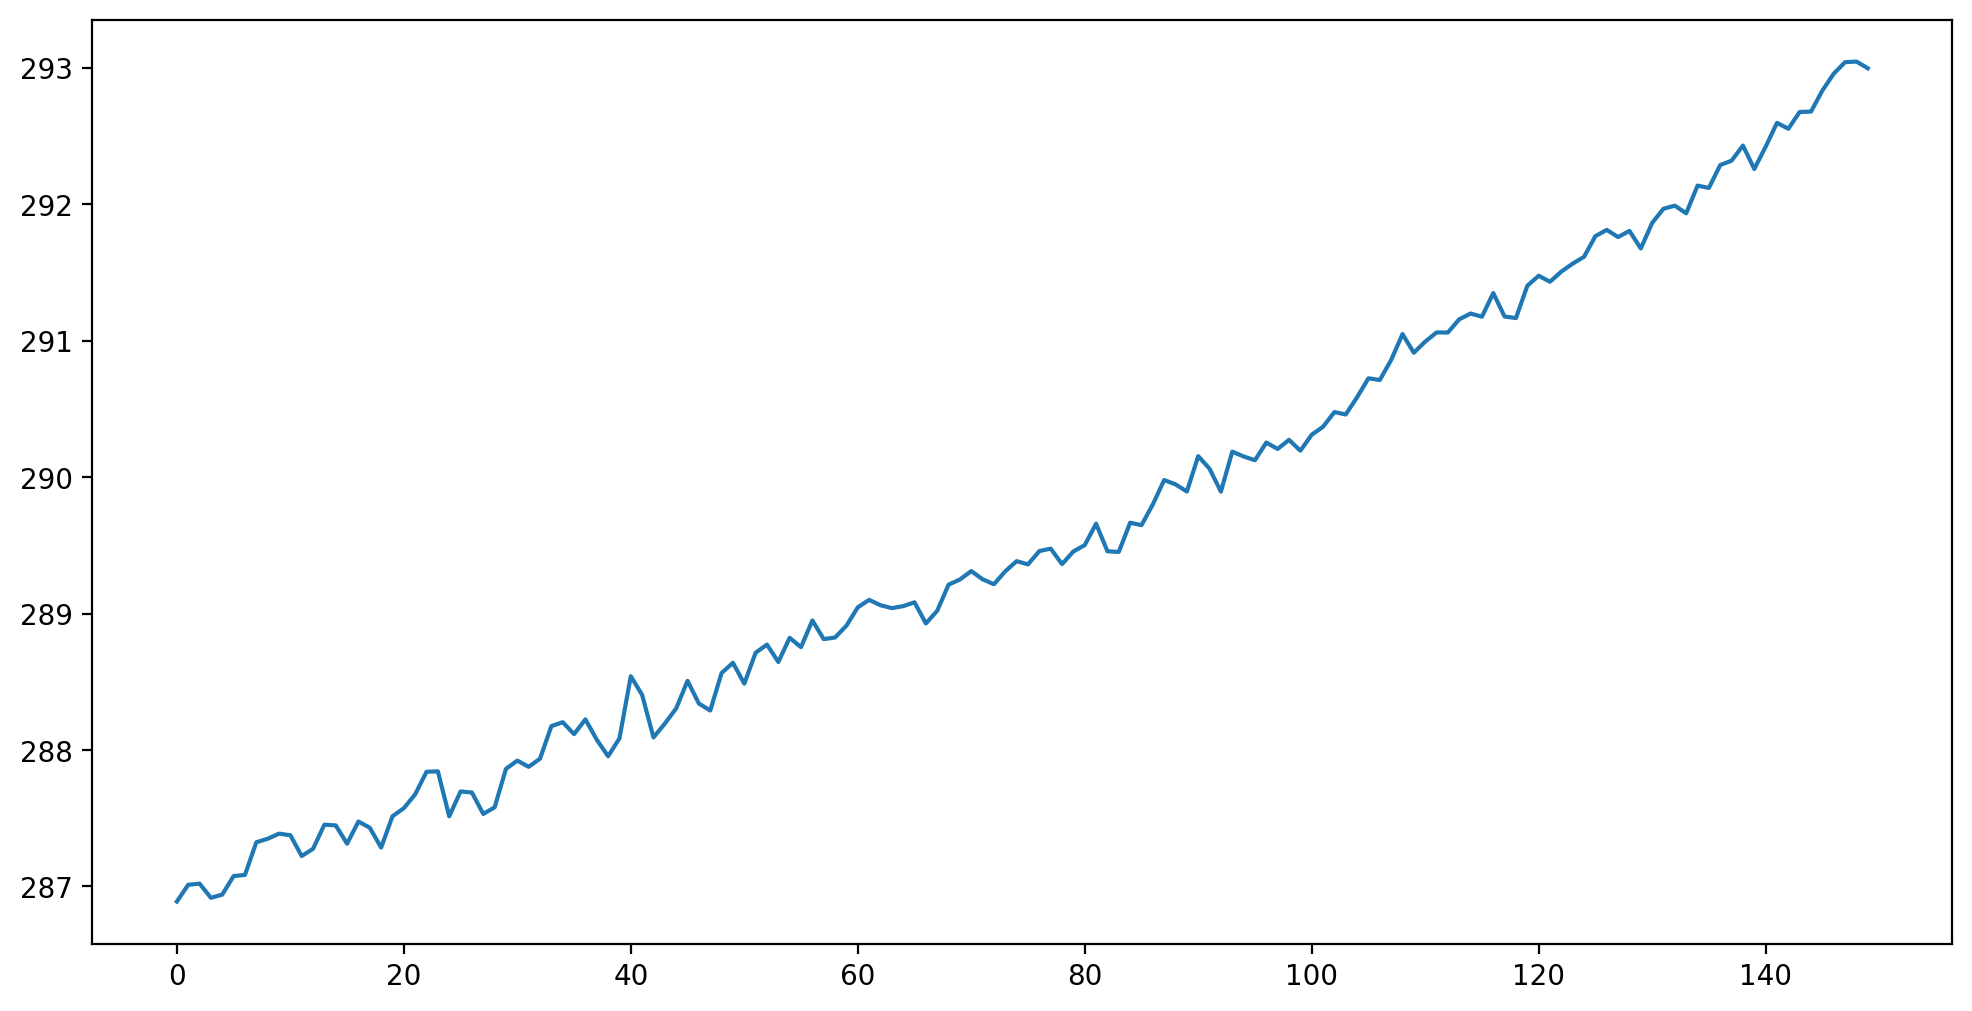

In [6]:
date_threshold = cftime.DatetimeNoLeap(166, 1, 1)
ds_tas_his_plt = ds_tas_his.where(ds_tas_his.time < date_threshold, drop=True)
tas_timeseries_his = (ds_tas_his_plt.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
array_tas_ts = np.array(tas_timeseries_his)
year_tas_ts = np.mean(array_tas_ts.reshape(len(array_tas_ts) // 12, 12), axis=1)
plt.plot(year_tas_ts)
plt.show()

In [ ]:
df_co2_ncar_1pct = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'co2' & institution_id == 'NCAR' & experiment_id == '1pctCO2'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_his = df_co2_ncar_1pct.zstore.values[-1]
print(zstore_his)

# create a mutable-mapping-style interface to the store
mapper_his = fsspec.get_mapper(zstore_his)

# open it using xarray and zarr
ds_co2_his = xr.open_zarr(mapper_his, consolidated=True)
date_threshold = cftime.DatetimeNoLeap(166, 1, 1)
ds_co2_his_plt = ds_co2_his.where(ds_co2_his.time < date_threshold, drop=True)
ds_co2_his_plt

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/1pctCO2/r1i1p1f1/Amon/co2/gn/v20191105/


<xarray.Dataset>
Dimensions:    (time: 1800, plev: 19, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 0001-01-15 12:00:00 ... 0150-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    co2        (time, plev, lat, lon) float32 dask.array<chunksize=(61, 19, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  182500.0
    case_id:                58
    ...                     ...
    tracking_id:            hdl:21.14100/0008f3ac-5414-4895-ab33-1f7ec75a26a2...
    variable_id:            co2
    variant_info:           CMIP6 CESM2 1pctCO2 experiment with interactive a...
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/0008f3ac-5414-4895-ab33-1f7ec75a26a2...
    version_id:             v20191105

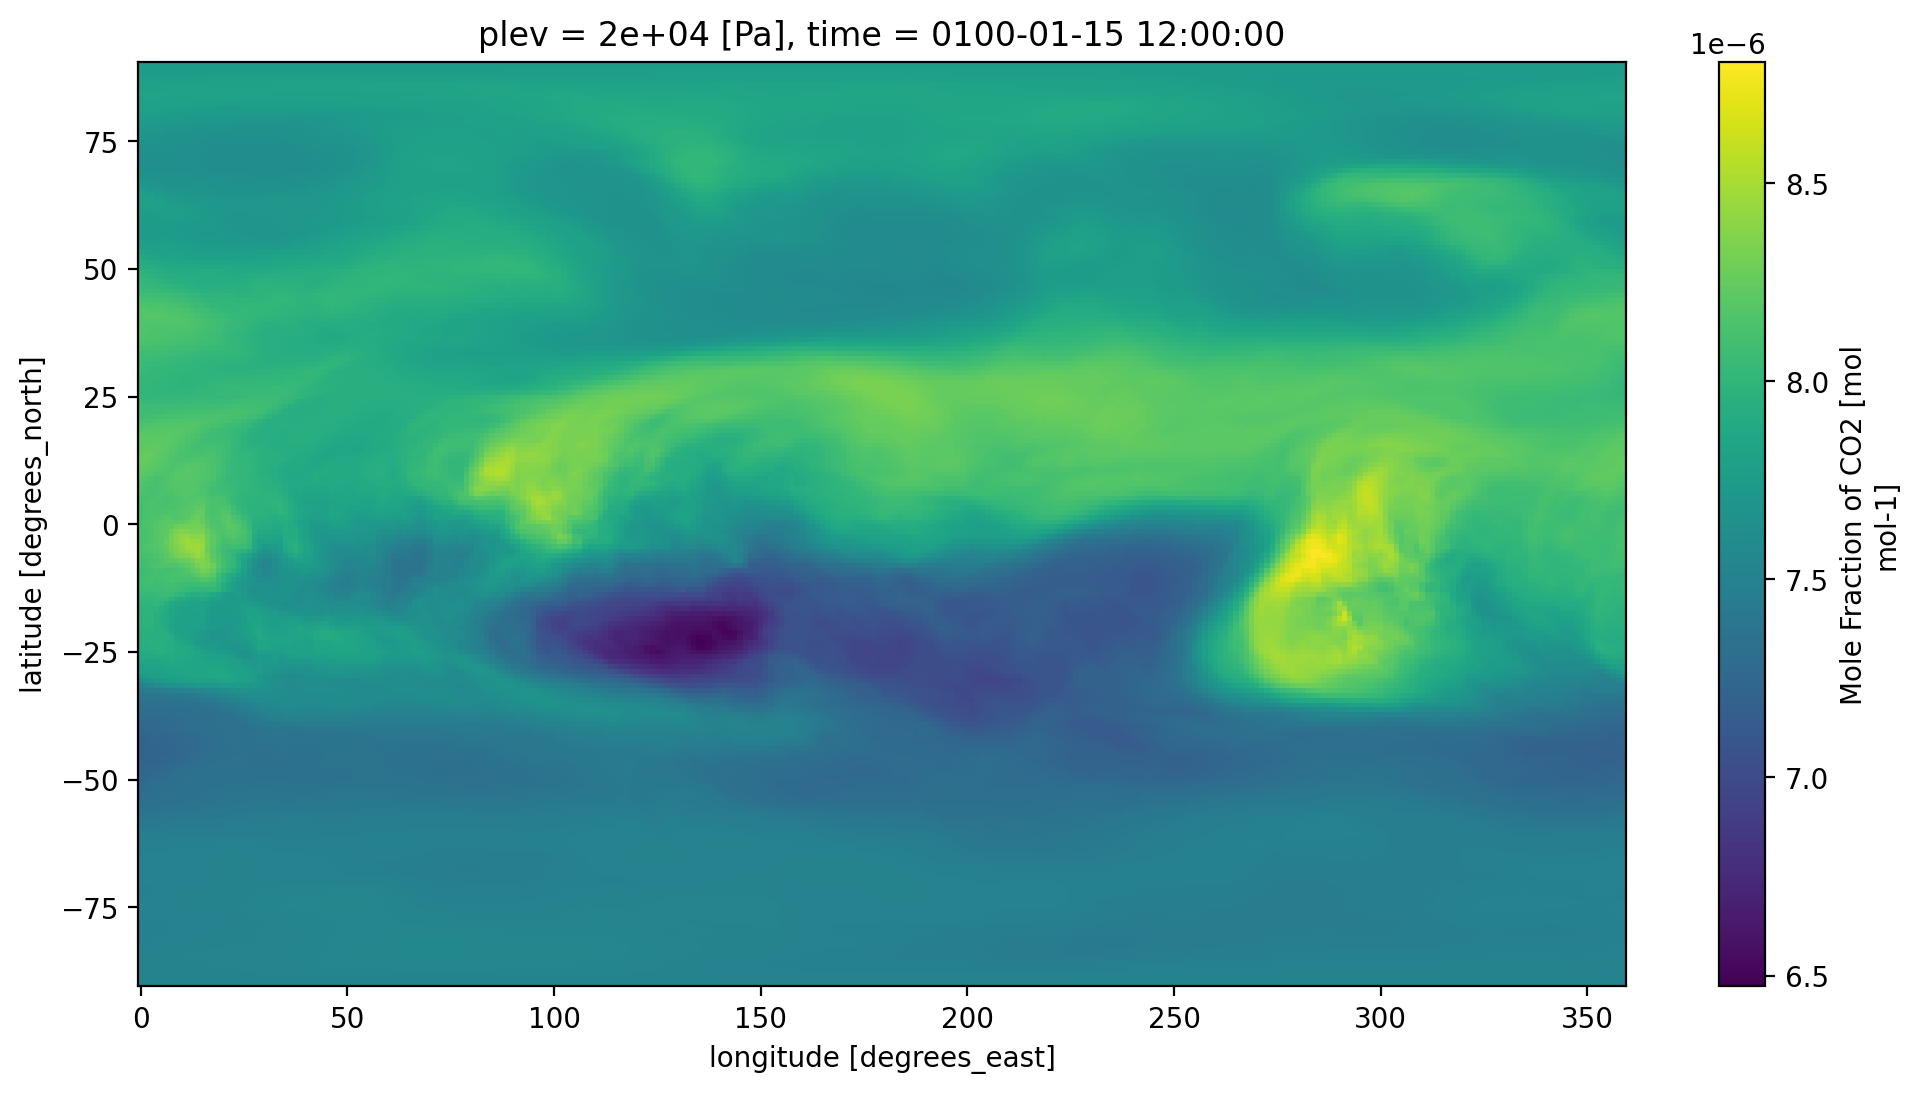

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
ds_co2_his_plt.co2.sel(time='0100-01').sel(plev=20000).squeeze().plot()

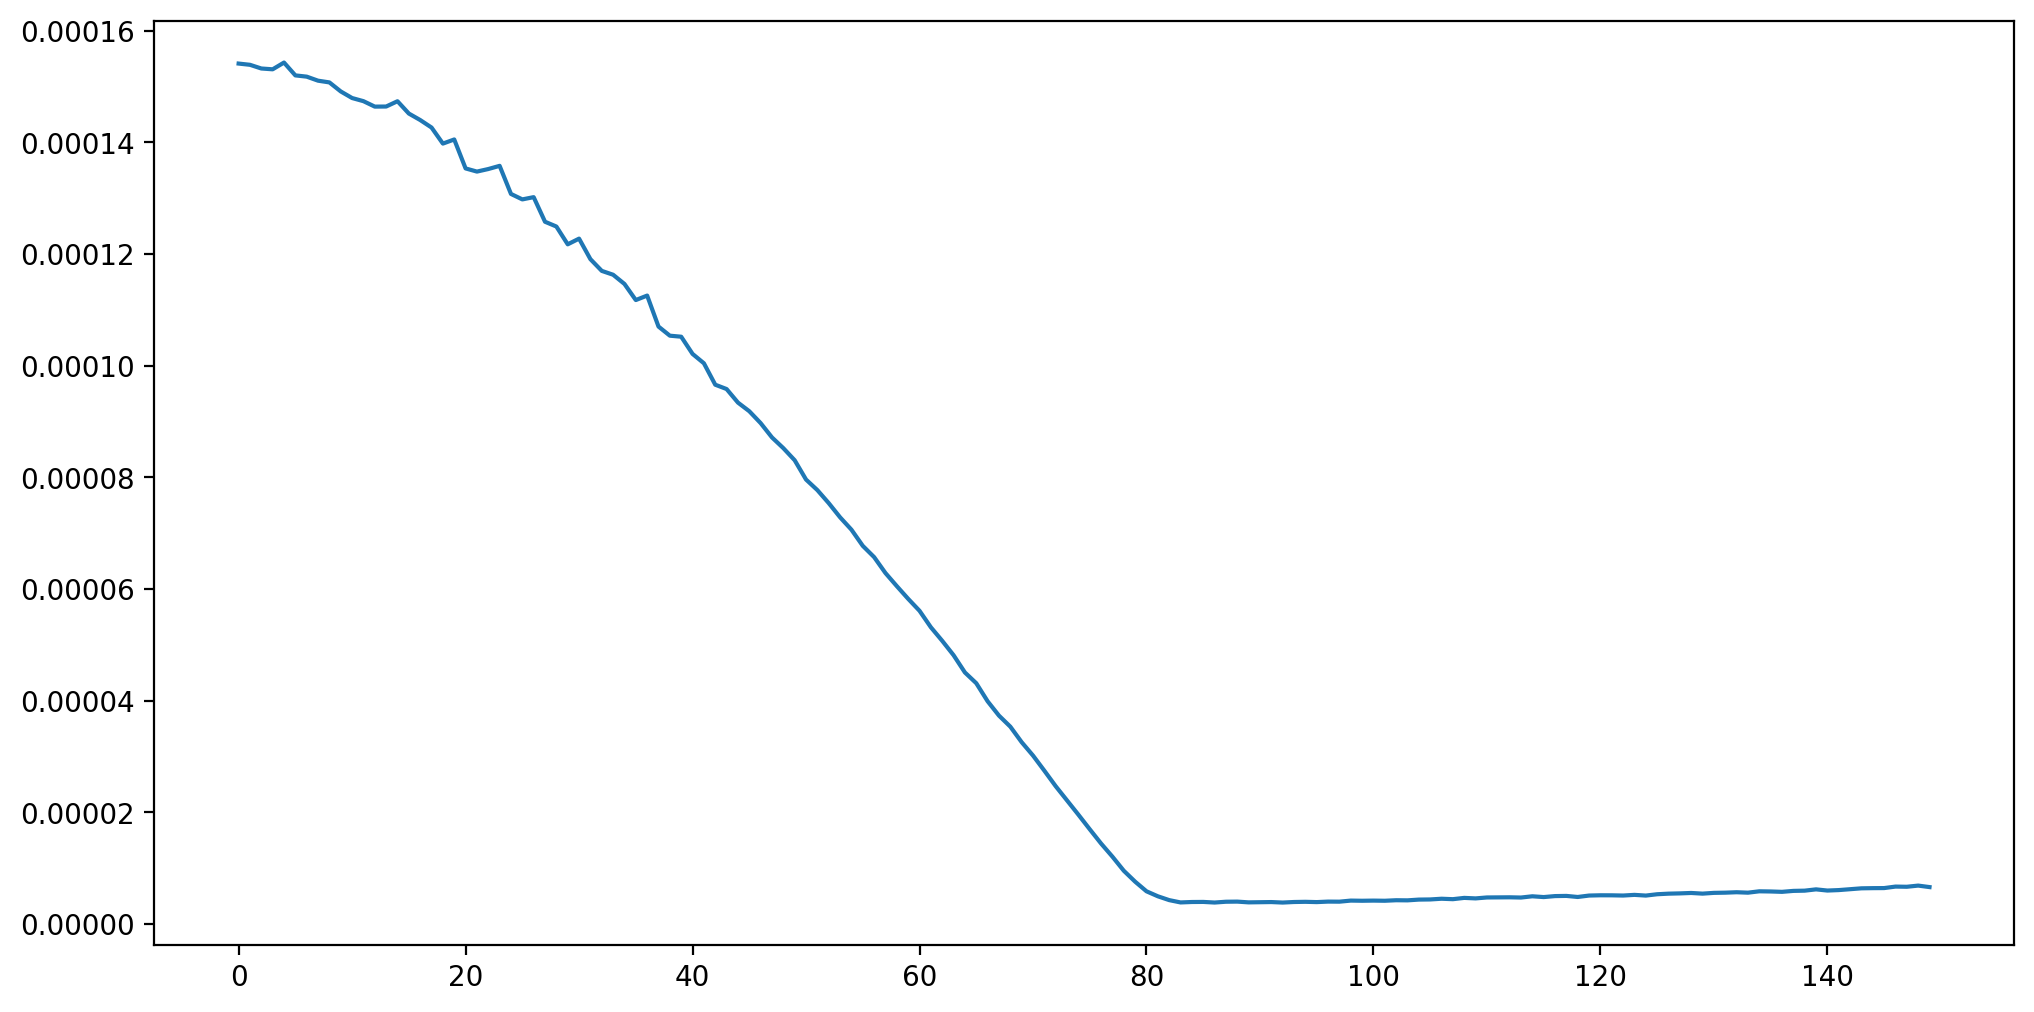

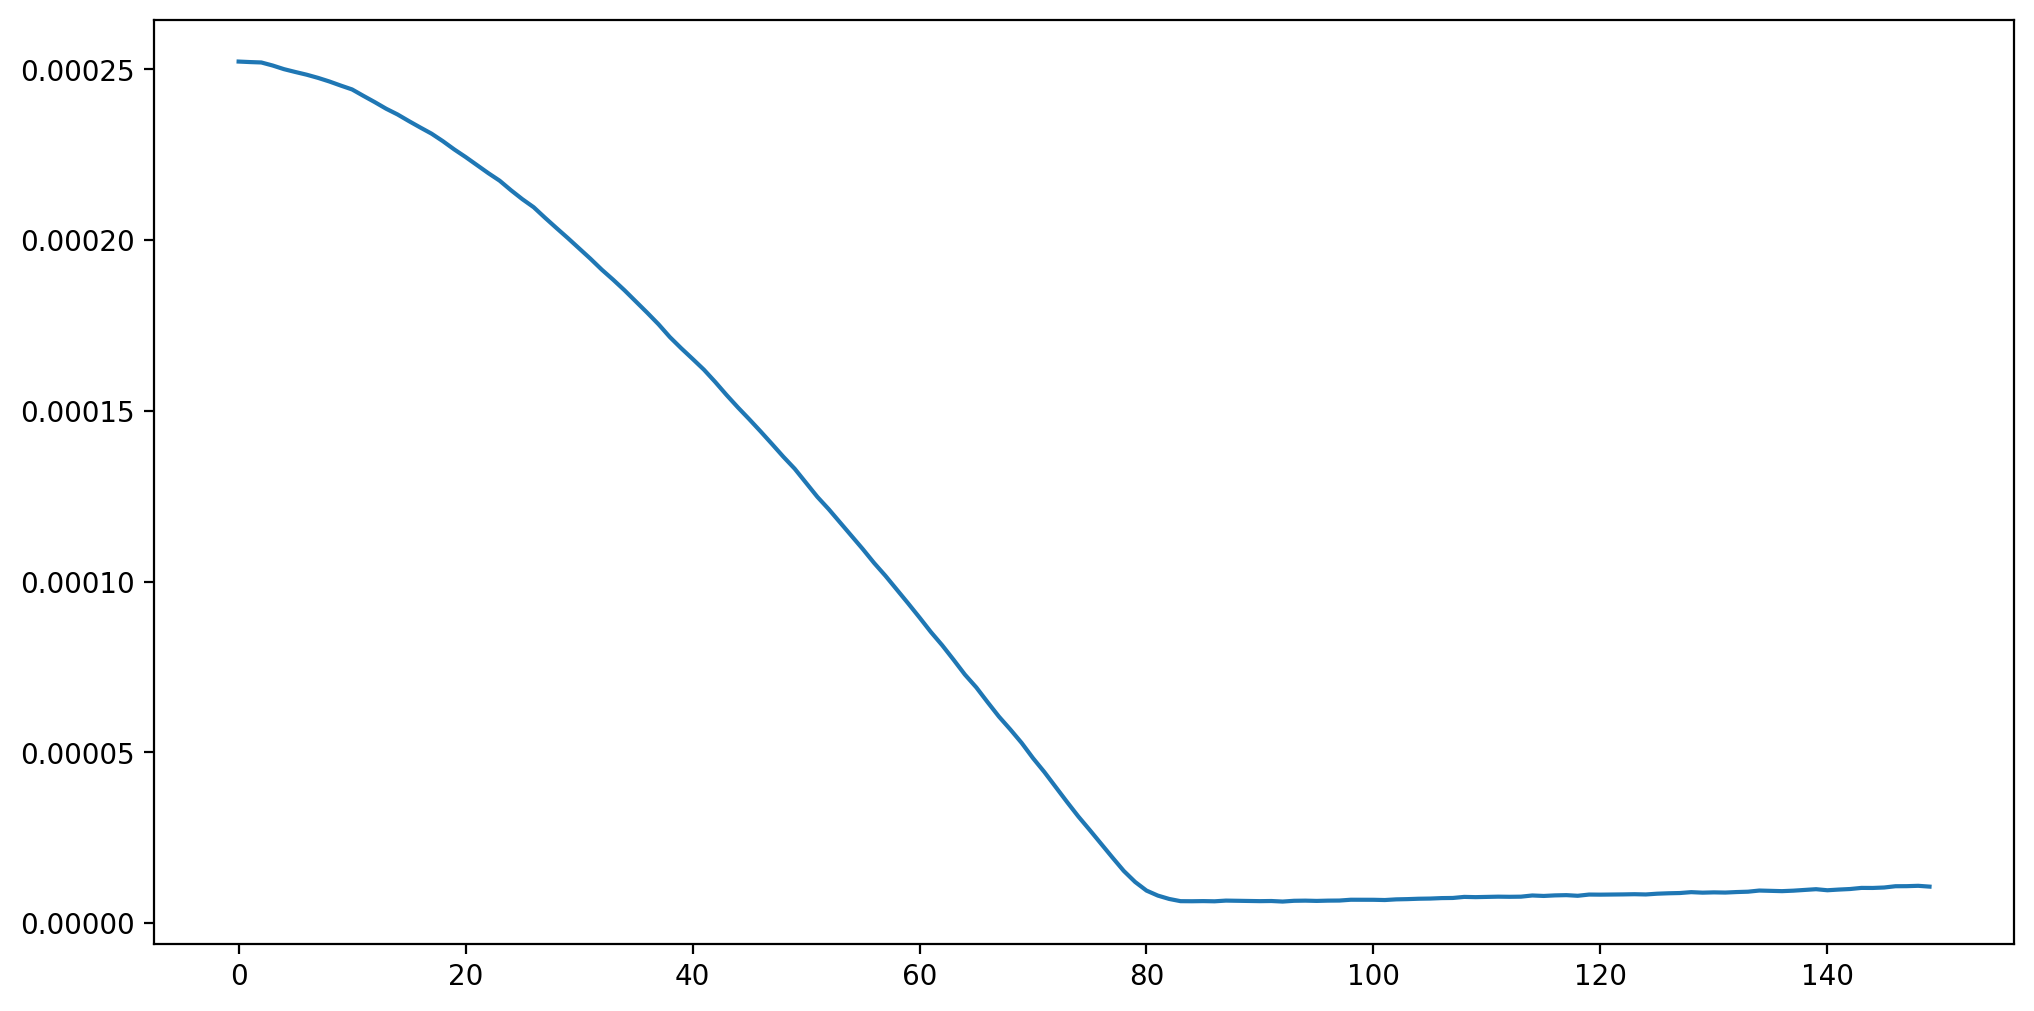

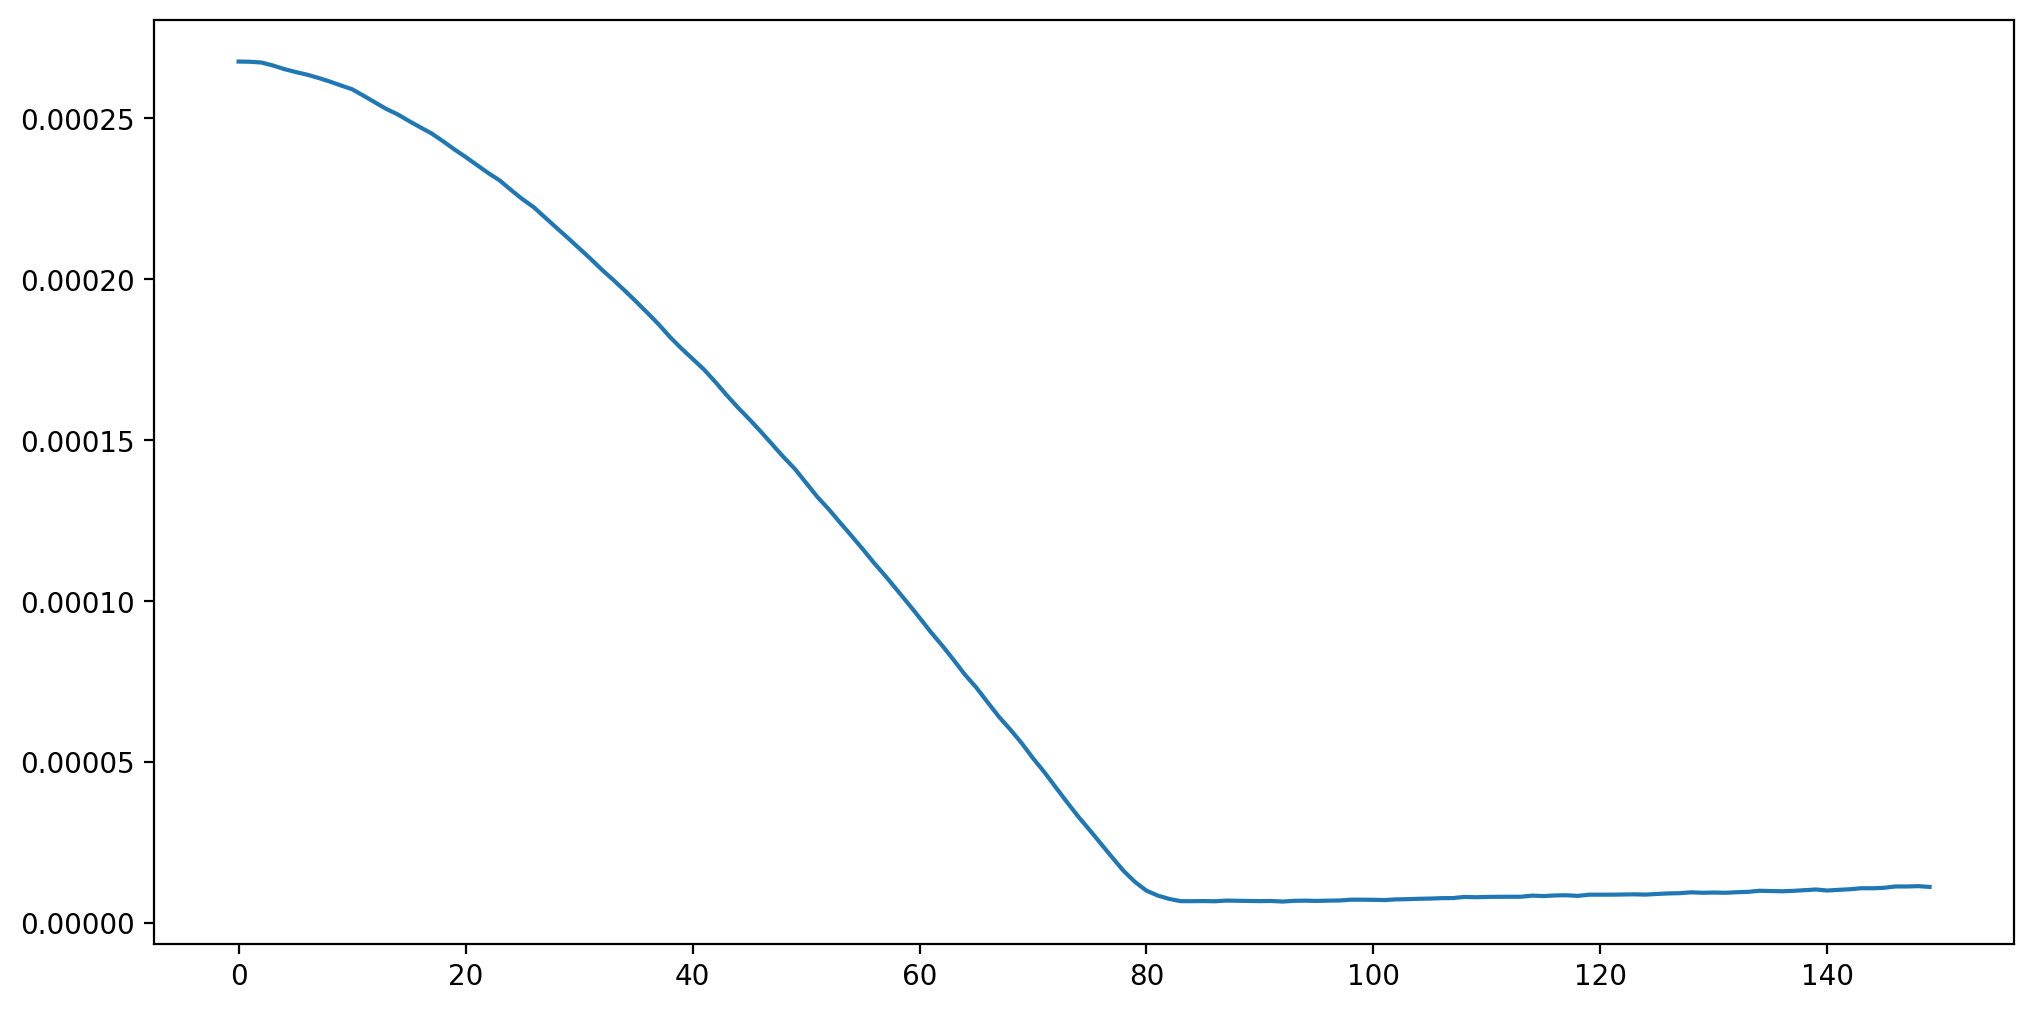

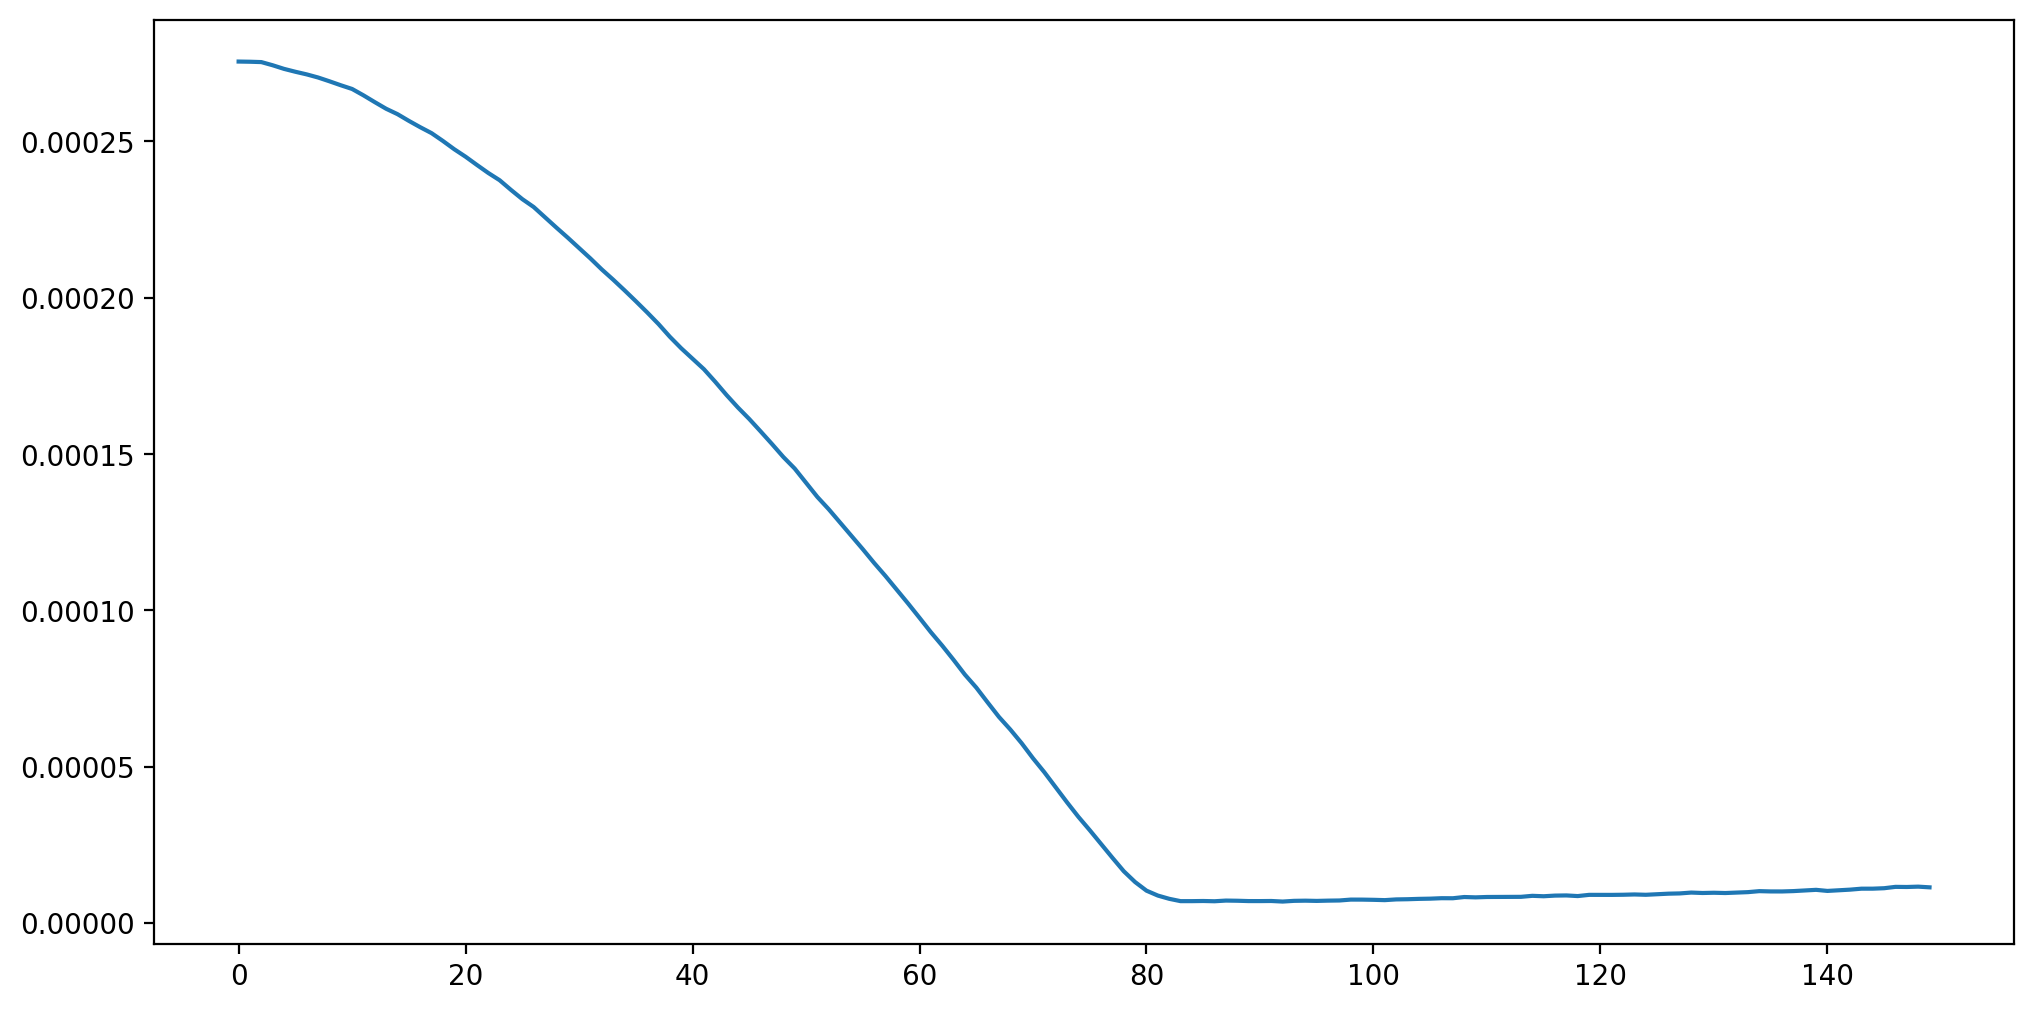

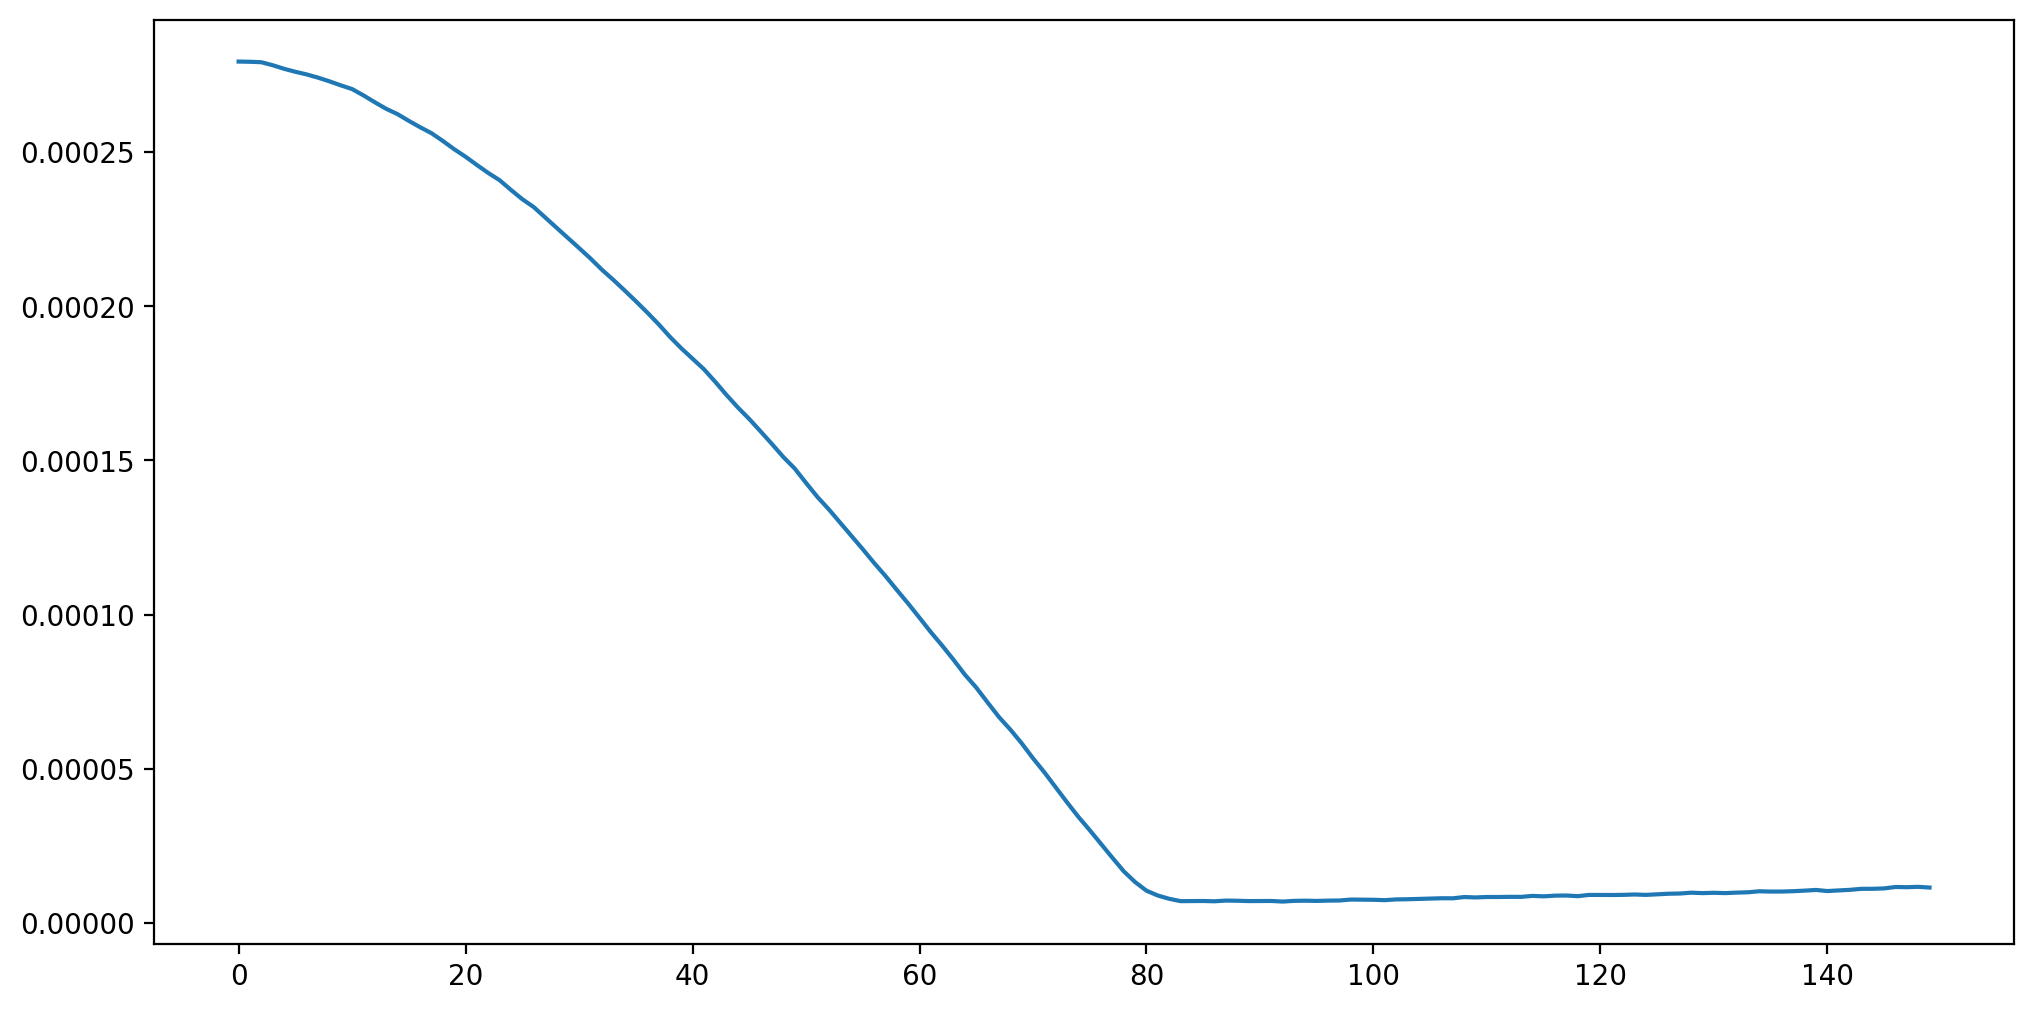

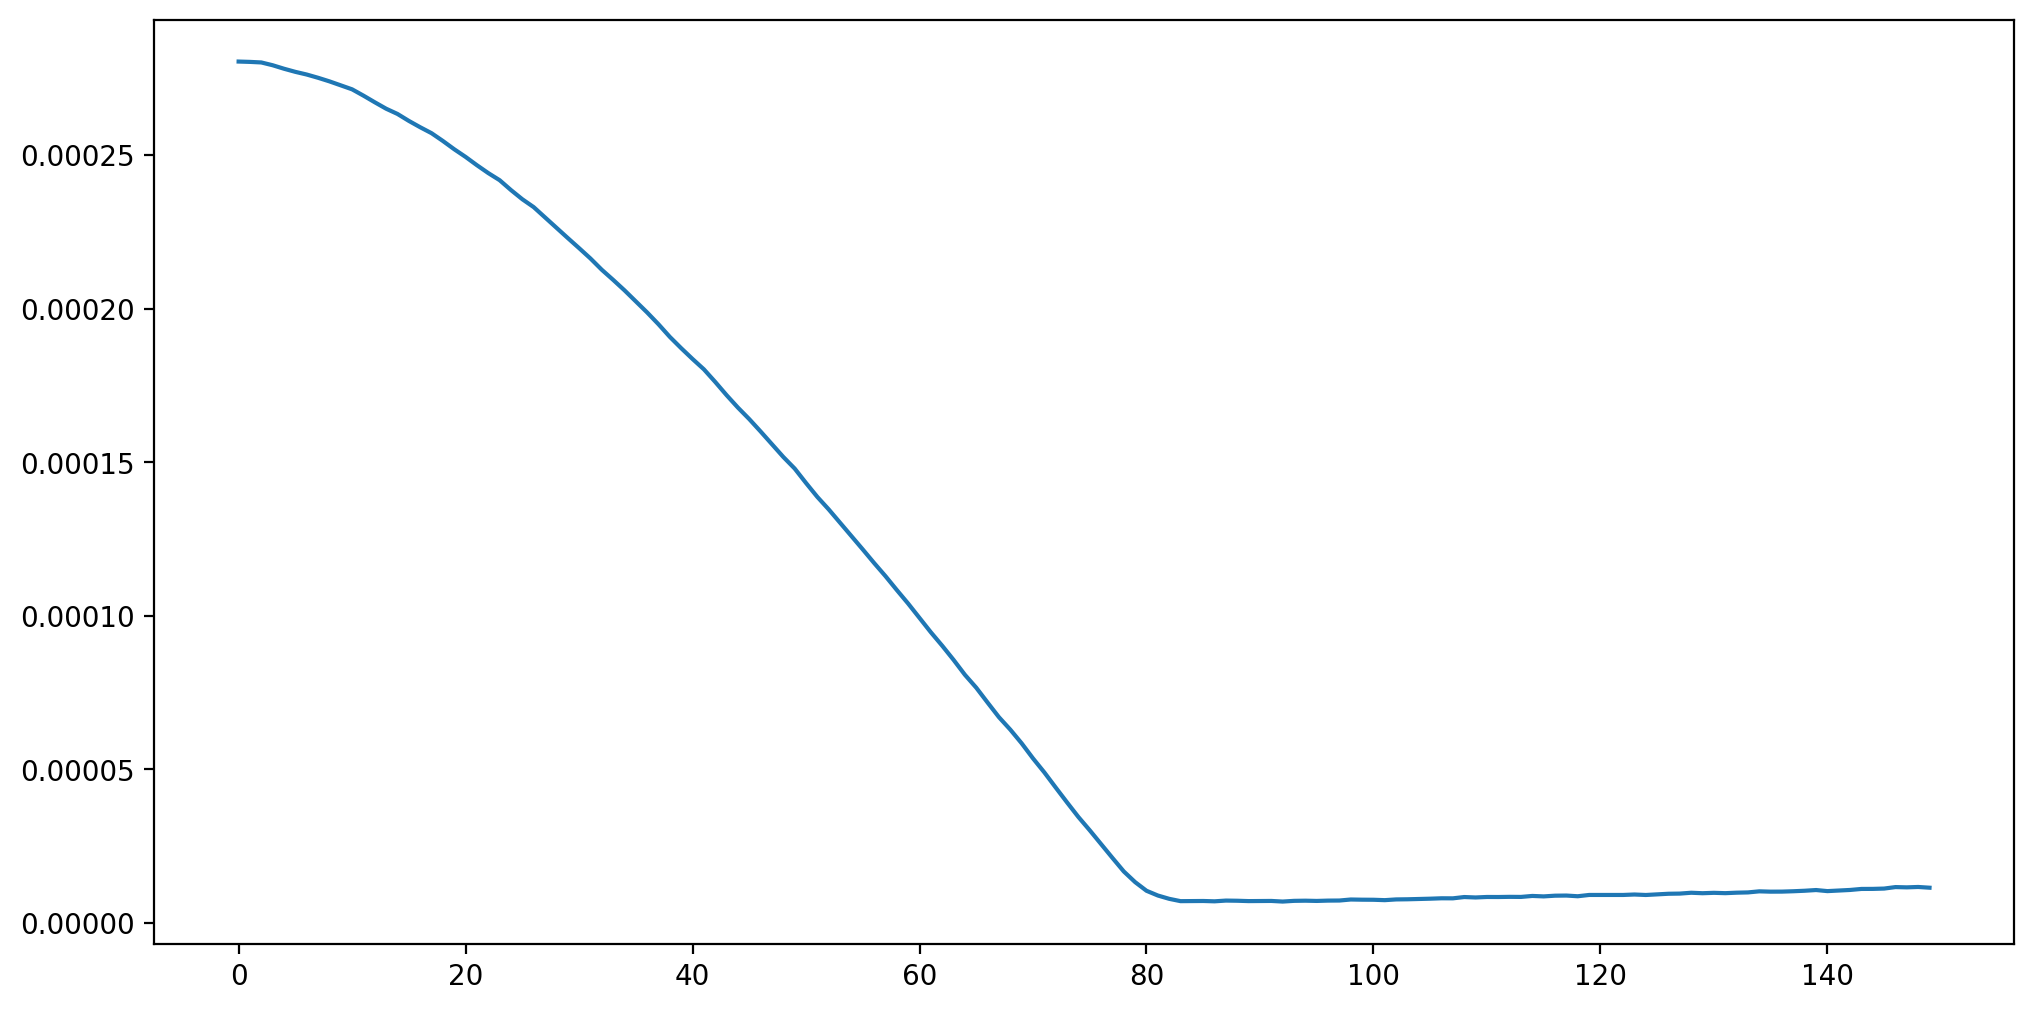

In [ ]:
for pres_lev in [100000.,  92500.,  85000.,  70000.,  60000.,  50000.]:
    ds_co2_his_plt_pres = ds_co2_his_plt.sel(plev=pres_lev).drop_vars("plev")
    ds_co2_his_plt_pres
    co2_timeseries_his = (ds_co2_his_plt_pres.co2 * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
    array_co2_ts = np.array(co2_timeseries_his)
    year_co2_ts = np.mean(array_co2_ts.reshape(150, 12), axis=1)
    plt.plot(year_co2_ts)
    plt.show()